In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [114]:
network = models.Sequential()
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [115]:
# flattening the pictures
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# standardizing
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [87]:
#train_images[0]

In [88]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [89]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1982 - accuracy: 0.9399
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0733 - accuracy: 0.9773
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0465 - accuracy: 0.9851
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0341 - accuracy: 0.9890
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0278 - accuracy: 0.9907


In [90]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'test_loss', test_loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.0691 - accuracy: 0.9812
test_acc: 0.9811999797821045 test_loss 0.06905044615268707


# Using Flatten

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [92]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [93]:
network = models.Sequential([
                            layers.Flatten(),
                            layers.Dense(128,activation ='relu'),
                            layers.Dense(128,activation ='relu'),
                            layers.Dense(10,activation ='softmax')
                            ])
network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [104]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0402 - accuracy: 0.9868
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0306 - accuracy: 0.9909
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0270 - accuracy: 0.9914
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0229 - accuracy: 0.9926
Epoch 5/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0194 - accuracy: 0.9934


In [105]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'test_loss', test_loss)

313/313 [==============================] - 0s 648us/step - loss: 0.0832 - accuracy: 0.9775
test_acc: 0.9775000214576721 test_loss 0.08318285644054413


In [106]:
predictions = network.predict(test_images)

In [110]:
predictions.shape

(10000, 10)

In [107]:
predictions[0]

array([6.9248612e-10, 1.0655130e-09, 2.7866728e-08, 3.4324535e-07,
       1.9697502e-13, 2.5442254e-11, 2.9994328e-14, 9.9999964e-01,
       1.5269058e-09, 1.4964877e-09], dtype=float32)

<Figure size 432x288 with 0 Axes>

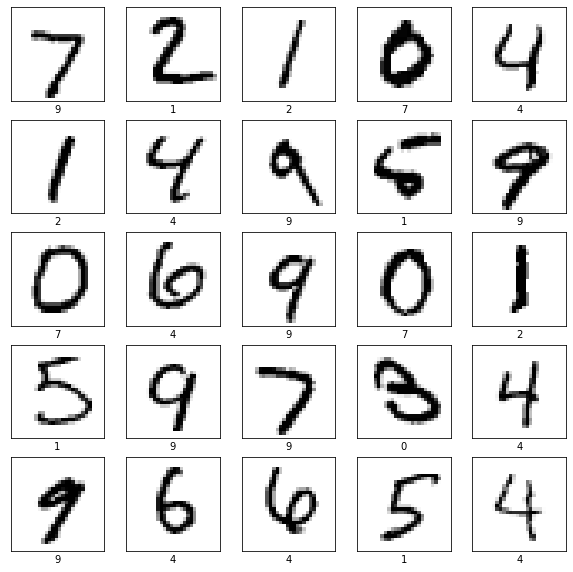

In [108]:
fig1 = plt.figure()
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.xlabel(test_labels[np.argmax(predictions[i])])